In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
df_eu_mo = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_monthly')
df_am_mo = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_monthly')

# Fix bad last values
df_eu_mo['VNF']['2015-12-01'] = 0.72
df_eu_mo['wnf']['2015-12-01'] = 0.26

In [4]:
df_eu_evnf = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_EVNF')
df_am_evnf = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_EVNF')

In [5]:
df_eu_mar = df_eu_mo[df_eu_mo.index.month == 3]
df_am_mar = df_am_mo[df_am_mo.index.month == 3]

df_eu_sept = df_eu_mo[df_eu_mo.index.month == 9]
df_am_sept = df_am_mo[df_am_mo.index.month == 9]

df_eu_yearlymean = df_eu_mo.resample('Y').mean()
df_am_yearlymean = df_am_mo.resample('Y').mean()

df_eu_yearlystd = df_eu_mo.resample('Y').std()
df_am_yearlystd = df_am_mo.resample('Y').std()

df_eu_mar_evnf = df_eu_evnf[df_eu_evnf.index.month == 3]
df_am_mar_evnf = df_am_evnf[df_am_evnf.index.month == 3]

df_eu_sept_evnf = df_eu_evnf[df_eu_evnf.index.month == 9]
df_am_sept_evnf = df_am_evnf[df_am_evnf.index.month == 9]

df_eu_yearlymean_evnf = df_eu_evnf.resample('Y').mean()
df_am_yearlymean_evnf = df_am_evnf.resample('Y').mean()

df_eu_yearlystd_evnf = df_eu_evnf.resample('Y').std()
df_am_yearlystd_evnf = df_am_evnf.resample('Y').std()

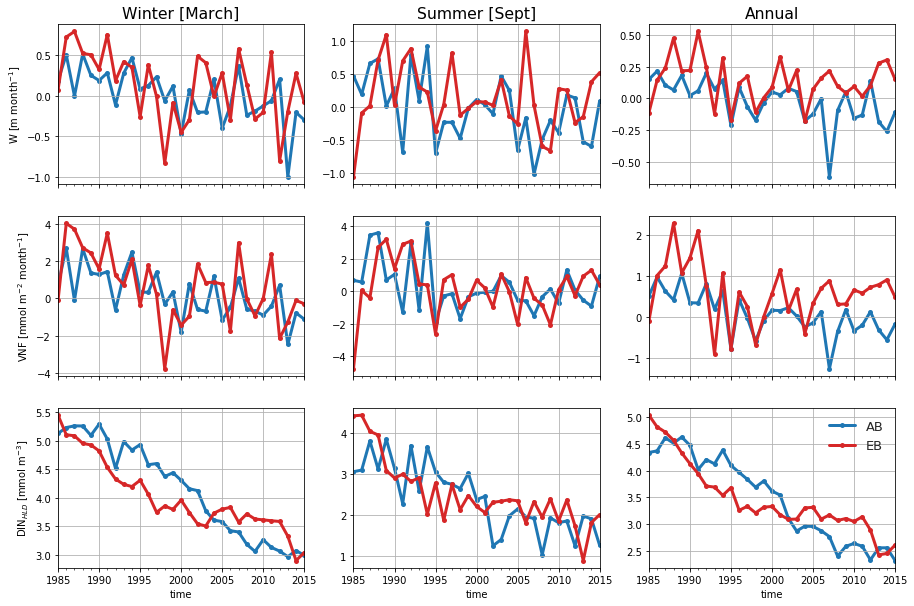

In [6]:
figsize = (15, 10)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

df_am_mar['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
ax1.set_title('Winter [March]')
ax1.set_ylabel('W [m month$^{-1}$]')

df_am_mar['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =2)
ax4.set_ylabel('VNF [mmol m$^{-2}$ month$^{-1}$]')

df_am_mar['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:red', zorder =2)
ax7.set_ylabel('DIN$_{HLD}$ [mmol m$^{-3}$]')

df_am_sept['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
ax2.set_title('Summer [Sept]')

df_am_sept['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:red', zorder =2)

df_am_sept['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['wnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =2)
ax3.set_title('Annual')

df_am_yearlymean['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['VNF'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['DINnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:red', zorder =2)



plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight') 

Text(0,0.5,'E-VNF [mmol m$^{-2}$ month$^{-1}$]')

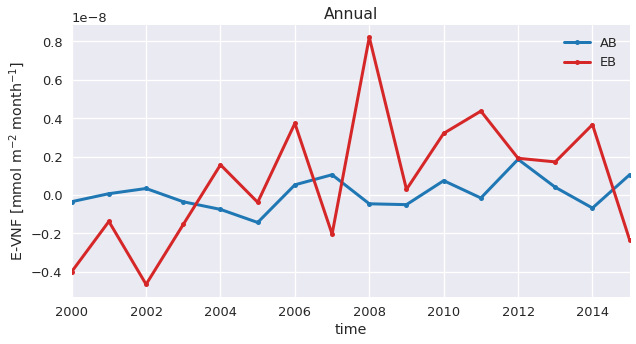

In [7]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

df_am_yearlymean_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
plt.legend({'AB','EB'})
ax.set_title('Annual')
ax.set_ylabel('E-VNF [mmol m$^{-2}$ month$^{-1}$]')

Text(0,0.5,'E-VNF [mmol m$^{-2}$ month$^{-1}$]')

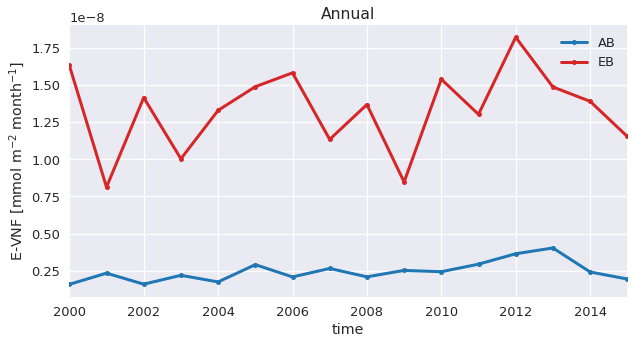

In [8]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

df_am_yearlystd_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlystd_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
plt.legend({'AB','EB'})
ax.set_title('Annual')
ax.set_ylabel('E-VNF [mmol m$^{-2}$ month$^{-1}$]')

Text(0.5,1,'Annual')

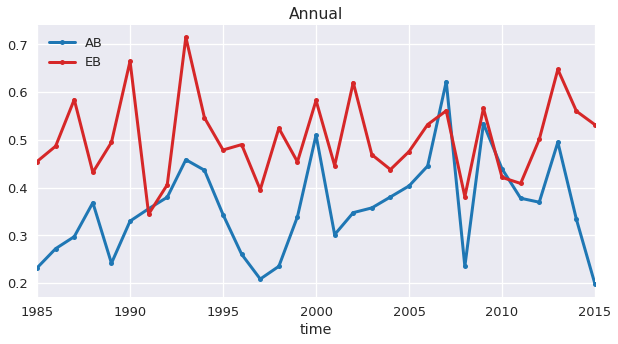

In [9]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

df_am_yearlystd['wnf'].plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlystd['wnf'].plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
plt.legend({'AB','EB'})
ax.set_title('Annual')

Text(0.5,1,'Annual')

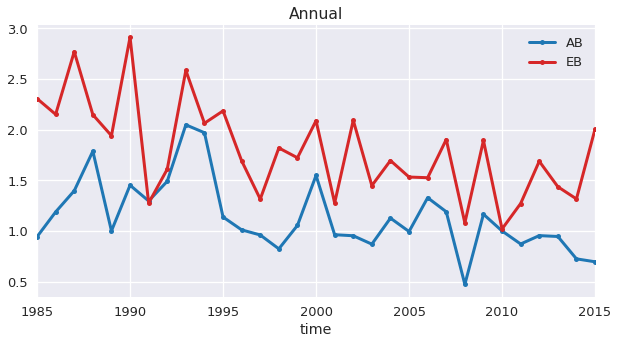

In [10]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

df_am_yearlystd['VNF'].plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlystd['VNF'].plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
plt.legend({'AB','EB'})
ax.set_title('Annual')

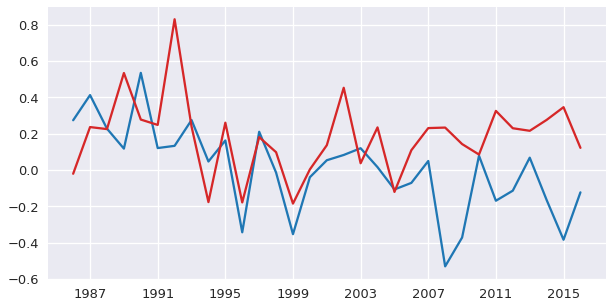

In [11]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.plot(df_am_yearlymean['VNF']/(2*df_am_yearlystd['VNF']), color = 'tab:blue')
plt.plot(df_eu_yearlymean['VNF']/(2*df_eu_yearlystd['VNF']), color = 'tab:red')

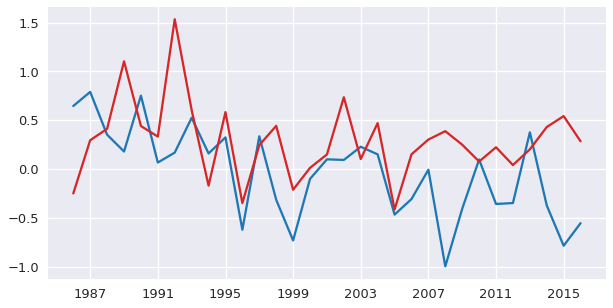

In [12]:
figsize = (10, 5)
fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.plot(df_am_yearlymean['wnf']/df_am_yearlystd['wnf'], color = 'tab:blue')
plt.plot(df_eu_yearlymean['wnf']/df_eu_yearlystd['wnf'], color = 'tab:red')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [14]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

X = years[8:]
y = df_eu_yearlymean['VNF']/df_eu_yearlystd['VNF']
X2 = sm.add_constant(X)
est = sm.OLS(y[8:], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VNF   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     6.476
Date:                Sat, 09 Jan 2021   Prob (F-statistic):             0.0189
Time:                        15:44:41   Log-Likelihood:                -4.6412
No. Observations:                  23   AIC:                             13.28
Df Residuals:                      21   BIC:                             15.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.4057     19.519     -2.531      0.0

ValueError: x and y must have same first dimension, but have shapes (23,) and (25,)

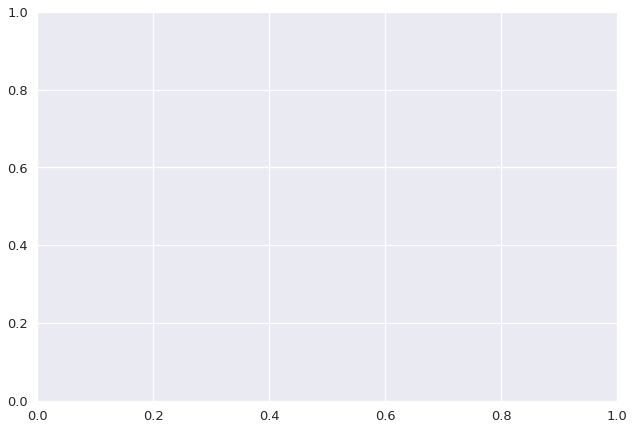

In [15]:
plt.plot(X,y[6:])